# Introduction to Python Programming
#### Interactive Jupyter Notebook

This notebook provides an introduction to <b>Python programming fundamentals</b>, including an overview of basic programing concepts, common data structures, and simple visualization. This notebook was created by Becky Vandewalle based off of prior work by Dandong Yin.

## Notebook Outline:
- [Introduction](#intro)
- [Setup](#setup) (run this first!)
- [Python Fundamentals](#py_fund)
    - [Python as a Calculator](#py_calc)
    - [Comments](#py_comment)
    - [Creating variables](#py_creat_var)
    - [Whitespace](#py_whitespace)
    - [Basic Object Types](#py_basic_obj)
    - [Boolean Operators and Comparisons](#py_bool_compar)
    - [Control Flow](#py_contl_flow)
    - [Importing Libraries](#py_import)
    - [Loop Structures](#py_loops)
    - [List Comprehension](#py_list_comp)
    - [Custom Functions](#py_func)
    - [File Operations](#py_file_ops)
- [Geospatial Data Processing](#geos_data_proc)
    - [Basic Plotting](#basic_plot)
    - [Basic Image Visualization](#basic_vis)

<a id='intro'></a>
## Introduction

Python is a commonly used scripting language that is popular due to its accessibility. While this notebook covers Python 2.7, many concepts are similar to Python 3.
>General documentation: https://docs.python.org/2.7/
<br>Python tutorial: https://docs.python.org/2.7/tutorial/index.html

<a id='setup'></a>
## Setup
Run this cell for the rest of the notebook to work!

In [1]:
# import required libraries

%matplotlib inline
import os
import json
import rasterio
import time

#execfile(os.path.join('/share/pyintro_resources/','highlight_feats.py'))

filename = os.path.join('pyintro_resources/','highlight_feats.py')
exec(compile(open(filename, "rb").read(), filename, 'exec'))

<a id='py_fund'></a>
## Python Fundamentals

This section will provide a brief overview of basic concepts and operations in Python.

<a id='py_calc'></a>
### Python as a Calculator

A simple, yet powerful attribute of Python is how you can use it to calculate basic numeric operations. This is useful for getting a first introduction to the language. You can type a sequence of numbers and operators into a cell to get a result like a calculator. Parentheses can be used to order operations.
> See a list of useful operators [here](https://www.python-course.eu/python3_operators.php).

Try running these cells to see how it works:

In [2]:
3 + 4

7

In [3]:
2 * 4

8

In [4]:
2 ** 4

16

In [5]:
10 / 3

3.3333333333333335

In [6]:
10.0 / 3

3.3333333333333335

In [7]:
10 % 3

1

In [8]:
250 / (5 + 5) * (7 - 3)

100.0

Pressing <b>Return</b> within a cell will create a new line in the cell code. When you run a cell, it will print the last value calculated unless you use Python's `print` statement to print earlier values.

In [9]:
2 + 3
4 + 6

10

In the cell above, the value of `2 + 3` isn't shown because `4 + 6` is calculated and returned after.

In [10]:
print(2 + 3)
4 + 6

5


10

Now both values are shown because `print` was explicitly called for `2 + 3`.

Note that some operators are <b>not automatically available</b> in the core Python library. For example, did you see a square root operator above? You can access additional functions using additional Python libraries (more on libraries [later](#py_import)).

In [11]:
import math
math.sqrt(16)

4.0

The square root function is available with the <b>Math</b> library.

<a id='py_comment'></a>
### Comments

Using a pound sign (`#`) in a Python line will create a <b>comment</b>. Comments don't have to be at the start of a line, but note that any part of the line after the pound sign will be considered a comment (unless it is part of a [string](#strings)), so you can't place comments in the middle of a data type that is expecting a specific character (like a closing a parenthesis or bracket in a [list](#list)).

In [12]:
# this is a comment

4 + 2 # this is another comment

6

In [13]:
# this cell will fail to run!

mylist = [1, 2, # comment]

SyntaxError: unexpected EOF while parsing (<ipython-input-13-f1c12498ee7a>, line 3)

In [14]:
# but this works (more on lists below)

mylist = [1, 2, # comment
         ]

In [15]:
# this pound sign does not start a comment
# it is within a string!

mystring = 'hi # comment?'
mystring

'hi # comment?'

<a id='py_creat_var'></a>

### Creating variables

To create a simple variable, type the <b>variable name</b>, the <b>equals (`=`) sign</b>, and the <b>variable value</b>. For example:

In [16]:
a = 1
b = 4

Here `a` is a variable, and its value is set to `1`. You can print the variable name to show its value, or type the variable name in the last line of the cell to see the value.

In [141]:
print(a)
b

10


0

Variable <b>names</b> must begin with an alphabetic character (`a`-`z`), digit (`0`-`9`), or underscore (`_`). Variable names are <b>case sensitive</b>!

In [18]:
One = 1
one = 1.0
print(One) # these are different
print(one)

1
1.0


In [19]:
# this will fail - not a valid variable name

*hi = 'hi'

SyntaxError: starred assignment target must be in a list or tuple (<ipython-input-19-b5e3fb302f80>, line 6)

<a id='py_whitespace'></a>
### Whitespace

<b>Blank lines</b> between code lines are ignored, so you can use blank lines to group things for ease of reading.

In [20]:
a = 1
b = 4

c = 'cat'

White space <b>within</b> a line is often ignored, so you can condense, align, or spread out code for clarity.

In [21]:
# these are all equivalent

a=3#comment
a = 3 # comment
a    =    3       #      comment

However, space is needed after or between <b>key words</b> and <b>commands</b> so Python can parse them properly.

In [22]:
# Not a good Example for Python 3
# prints a

print(a)

3


In [23]:
# fails - no command or variable called 'printa' exists

printa

NameError: name 'printa' is not defined

White space <b>in the front of</b> a line is <b>very important</b> for python to work correctly. When typing code in a cell, make sure each regular line starts at the very beginning of the line with no leading space.

In [24]:
# this works

a = 2
b = 3

In [25]:
# this will fail

a = 2
 b = 3

IndentationError: unexpected indent (<ipython-input-25-ebe8754f8722>, line 4)

<b>Indentation</b>, typically using <b>Tab</b>, represents a group of lines (called a <b>code block</b>) that are related to the last unindented line. Each indented line in a cell needs to match up with all the other lines that are indented the same amount of times and the same amount of space (again usually in increments of Tab) needs to occur before each indented line. Although you can indent code blocks with spaces instead of Tabs, it is often easier to use Tab (and you need to be consistent throughout a script or within a cell).

In [27]:
# example of indented block

a = 2
if a:
    print('a exists')

a exists


In [28]:
# you can have multiple indentation levels

a = 2
if a:
    print('a exists')
b = 3
if b:
    print('b exists')
if a:
    if b:
        print('a and b exist')

a exists
b exists
a and b exist


In [29]:
# indent with spaces
# this works, but Jupyter notebook will highlight keywords in red because it expects Tab
a = 2
if a:
  print('a exists')
b = 3
if b:
  print ('b exists')

a exists
b exists


In [30]:
# this works but is --NOT-- recommended - make sure your indents match!

a = 2
if a:
  print ('a exists')
b = 3
if b:
    print ('b exists')

a exists
b exists


In [31]:
# this doesn't work
# indentation is not consistent within a code block

a = 2
if a:
  print ('a exists')
    print ('not sure if b exists')

IndentationError: unexpected indent (<ipython-input-31-6d5ba24f2301>, line 7)

<a id='py_basic_obj'></a>
### Basic Object Types

Python has a variety of basic variable types, and we have already seen a few! See some further examples below. The <b>type</b> function can indicate an object or variable's type.

Basic <b>numeric</b> types:

In [32]:
1    # integer
1.0  # float

1.0

In [33]:
print(type(1))
print(type(1.0))

<class 'int'>
<class 'float'>


In [34]:
# convert between types

print(float(1))
print(int(1.23)) # truncates
print(int(1.83)) # does not round

1.0
1
1


<b>None</b> type:
<br><br>None is a special designation to indicate that the variable exists but has not been assigned to a particular value.

In [35]:
a = None
print(a)

None


<b>Boolean</b> types:

A special type is a Boolean variable. This designates a variable as `True` or `False` (note the case!). 

In [36]:
a = True
b = False

In [37]:
# this fails because a variable 'true' hasn't been defined

a = true

NameError: name 'true' is not defined

You can check if a variable is `True` or `False` like this:

In [38]:
a is True

True

In [39]:
print(a is False)
print(b is True)
print(b is False)

False
False
True


There are special cases where other types of variables evaluate to `True` or `False`. While most variable values evaluate to `True`, variables set to `None`, equal to `0`, `0.0` or equivalent, or empty are `False`. Note that evaluating to `True` or `False` is not the same as being assigned to `True` or `False`.

In [40]:
# will evaluate code block if a evaluates to true

a = 3
if a:
    print('a')

a


In [41]:
# here, b evaluates to false; nothing prints

b = 0
if b:
    print ('b')

In [42]:
# a evaluates to True but does not equal true

a = 3
a is True

False

<b>Strings</b>: <a id='strings'></a>
<br><br>
A <b>string</b> is a sequence of alpha-numeric characters:

In [43]:
'hello'
'cloud9'

'cloud9'

In [44]:
type('hello')

str

<b>Accents</b> and <b>Unicode characters</b> are supported, but may cause issues with string functions if not handled carefully.

In [45]:
cafe = 'café'
cafe

'café'

In [46]:
print (cafe)

café


A '`u`' in front of a string designates it as unicode. You can copy unicode characters to use to set a variable like this:

In [47]:
hello = u'你好'
hello

'你好'

In [48]:
print (hello)

你好


Or you can define unicode characters using an <b>escape sequence</b>. Here '\u4f60' refers to 你. 

In [49]:
hello2 = u'\u4f60\u597d'
hello2

'你好'

In [50]:
print (hello2)

你好


<b>Escaping characters</b>:

<b>Escape characters</b> reference special characters that are part of a string but can't be directly typed into a string. For example, you can not include a single quote (`'`) in a string unless it is escaped. To escape a special character, prefix it with the back slash (`\`).
>See a list of escape characters [here](https://linuxconfig.org/list-of-python-escape-sequence-characters-with-examples)

In [51]:
# a new line \n is a common escape character

new_line_str = 'hi\nhi2'
new_line_str

'hi\nhi2'

In [52]:
# it prints with the new line

print (new_line_str)

hi
hi2


In [53]:
print ('don\'t', 'path\\to\\file')

don't path\to\file


<b>'Smart Quotes'</b>:

Be careful when copying text that uses 'smart quotes', these are quotation marks and apostrophes that are curved. Python does't recognize these characters!

<table align="left"><tr><td><b>Use this!</b></td><td><b>Not this!</b></td><td></td><td></td>
    <td><b>Use this!</b></td><td><b>Not this!</b></td></tr>
    <tr><td><font size=6>"</font></td><td><font size=6>“</font></td><td></td><td></td>
    <td><font size=6>'</font></td><td><font size=6>‘</font></td></tr>
    <tr><td><font size=6>"</font></td><td><font size=6>”</font></td><td></td><td></td>
    <td><font size=6>'</font></td><td><font size=6>’</font></td></tr>
</table>

In [54]:
# this cell will fail

copy_text = “Hello there”

SyntaxError: invalid character in identifier (<ipython-input-54-35798cf547a6>, line 3)

Other types of sequences include <b>lists</b> and <b>tuples</b>. <a id='list'></a> Elements in a list can be changed, but elements in a tuple can not unless a new tuple is created. 

In [55]:
# lists are created using square brackets

mylist = [1, 2, 3]
mylist

[1, 2, 3]

In [56]:
# you can add a value to a list after making it

mylist.append(4)
mylist

[1, 2, 3, 4]

In [57]:
# tuple are created using parentheses

mytuple = (1, 2, 3)
mytuple

(1, 2, 3)

In [58]:
# you can't add a value to a tuple

mytuple.append(4)

AttributeError: 'tuple' object has no attribute 'append'

In [59]:
# this works because newtuple is a new tuple, but may not work as you would expect!

newtuple = (mytuple, 4)
newtuple

((1, 2, 3), 4)

You can select a specific value of a list or tuple using <b>square brackets</b> around the item's <b>index</b>. These need to be directly at the end of the variable name. Python index values start from `0`. 

In [60]:
# select by index

print (mylist[2])
print (mytuple[0])

3
1


`:` is a special value that will select all items.

In [61]:
# select all

print (mylist[:])

[1, 2, 3, 4]


Using a negative index value will count from the back. It starts with `-1`.

In [62]:
print (mytuple[-1])

3


It is possible to stack indices to select an item in a multi-level list.

In [63]:
# multi-level index

nested_list = [[1, 2], [3, 4]]
nested_list[0][1] # select first list, then second item

2

You can change and delete values from a list using the index.

In [64]:
# change last list item

nested_list[-1] = [4, 5]
nested_list

[[1, 2], [4, 5]]

In [65]:
# delete list value

del nested_list[0][0]
nested_list

[[2], [4, 5]]

<b>Dictionaries</b>:
   
<b>Dictionaries</b> are a collection of <b>unordered</b> key-value pairs.

In [66]:
# lists are created using curly braces

pet_list = {'alice':'cat', 'becky':'cat', 'chaoli': 'parrot', 'dan':'dog'}
pet_list

{'alice': 'cat', 'becky': 'cat', 'chaoli': 'parrot', 'dan': 'dog'}

In [67]:
print (pet_list)

{'alice': 'cat', 'becky': 'cat', 'chaoli': 'parrot', 'dan': 'dog'}


<b>Dictionaries</b> have <b>keys</b> and <b>values</b>. This is similar to a physical dictionary - you look up a word to find its definition.

In [68]:
# list all keys

pet_list.keys()

dict_keys(['alice', 'becky', 'chaoli', 'dan'])

In [69]:
# list all values

pet_list.values()

dict_values(['cat', 'cat', 'parrot', 'dog'])

You can find which specifically value goes with which key by using the key as the index.

In [70]:
pet_list['dan']

'dog'

Like lists, you can change dictionary keys and values after the fact. 

In [71]:
# add a key/value pair

pet_list['ewan'] = 'bunny'
pet_list

{'alice': 'cat',
 'becky': 'cat',
 'chaoli': 'parrot',
 'dan': 'dog',
 'ewan': 'bunny'}

It's good to check if a key/value pair exists before deleting a value.

In [72]:
# delete a key/value pair

if 'alice' in pet_list.keys():
    del pet_list['alice']
pet_list

{'becky': 'cat', 'chaoli': 'parrot', 'dan': 'dog', 'ewan': 'bunny'}

Dictionaries can be nested.

In [73]:
pet_list_ext = {'alice': {'type':'cat', 'age':3}, 
            'becky': {'type':'cat', 'age':9}, 
            'chaoli': {'type':'parrot', 'age':23}, 
            'dan': {'type':'dog', 'age':7.5}}
pet_list

{'becky': 'cat', 'chaoli': 'parrot', 'dan': 'dog', 'ewan': 'bunny'}

Use the double named index selection to retrieve values in nested dictionaries.

In [74]:
pet_list_ext['chaoli']['type']

'parrot'

<a id='py_bool_compar'></a>
### Boolean Operators and Comparisons

<b>Boolean Operators</b> are used to evaluate combinations of either Boolean variables or other variables through evaluation. The operators are <b>`and`</b>, <b>`or`</b>, and <b>`not`</b>.
    
Try to guess what will be returned for each combination below!

In [75]:
True and True

True

In [76]:
True and False

False

In [77]:
False and False

False

In [78]:
True or True

True

In [79]:
True or False

True

In [80]:
not True

False

In [81]:
not False

True

In [82]:
if (1 and 'hi'): # through evaluation
    print('OK')

OK


In [83]:
if (0 and 'hi'): # through evaluation
    print('OK')

<b>Comparisons</b> are used to evaluate relative values (ex. is x greater than y), equivalence, or identity. A few examples are shown below.

In [84]:
1 > 2

False

In [85]:
1 < 2

True

In [86]:
1 >= 2

False

In [87]:
1 <= 2

True

<b>NOTE!</b> Testing for equivalence needs <b>two</b> equal signs, not one!

In [88]:
# are these equal?

1 == 1 

True

In [89]:
# this fails

1 = 1

SyntaxError: can't assign to literal (<ipython-input-89-33a6cb59e94d>, line 3)

In [90]:
1 != 2 # is not equal to

True

<b>`is`</b> and <b>`is not`</b> can also be used for comparisons.

In [91]:
1 is 2

False

In [92]:
1 is not 2

True

You can use <b>`in`</b> and <b>`not in`</b> to see if a value is part of a sequence.

In [93]:
1 in (1, 2, 3)

True

In [94]:
1 not in (1, 2, 3)

False

<a id='py_import'></a>

### Importing Libraries

There are a few different ways to <b>import</b> a Python library or specific function from a library. 

If you import an entire library, you need to preface a function in that library with the library name. For some commonly used libraries or ones with long names, it is common to give it a nickname when importing. If you import a specific function from a library, you can use that function without prefixing it with the library name.

In [95]:
import time                        # import entire library
import numpy as np                 # call numpy using np
from math import sqrt              # just import square root function from math library
from math import factorial as fac  # just import factorial function from math library, call it fac

Be careful with your nicknames because you could potentially conflict with an existing function.

In [96]:
# prints current time (seconds since January 1, 1970)

print(time.time())

1576012479.3995113


In [97]:
# call numpy function using nickname np for numpy

np.array([2,3,4])

array([2, 3, 4])

In [98]:
# can call sqrt function without having 'math.' in front

sqrt(16) 

4.0

In [99]:
# can call factorial function by nickname without having 'math.' in front

fac(5)

120

<a id='py_contl_flow'></a>
### Control Flow

Most of the time python programs run line by line, executing each statement in order from top to bottom. However, there are cases when certain lines should be skipped if some <b>condition occurs</b>, or a certain section of code should be <b>run many times</b>. Control flow tools are used to change the order or number of times lines or code sections are run.

In [100]:
# if a exists, print

a = 3
if a:
    print ('a =', a)

a = 3


In [101]:
# print elements in list

mylist = [1, 2, 3]
for i in mylist:
    print (i, end=" ")

1 2 3 

The `range` function returns a list of numbers from `0` to the specified number.

In [102]:
range(5)

range(0, 5)

In [103]:
# print numbers in a certain range

for i in range(5):
    print (i, end=" ")

0 1 2 3 4 

Certain keywords can affect how the loop functions:

In [104]:
# stop if 7 is reached

for i in range(10):
    if i == 7:
        break
    print (i, end=" ")

0 1 2 3 4 5 6 

In [105]:
# prints '- no break' if loop completed without break

for i in range(10):
    if i == 12:
        break
    print (i, end=" ")
else:
    print ('- no break')

0 1 2 3 4 5 6 7 8 9 - no break


In [106]:
# skips even numbers, but continues through loop after

for i in range(10):
    if i % 2 == 0:
        continue
    print (i, end=" ")

1 3 5 7 9 

Sometimes it is useful to have a placeholder in a loop. Here the loop loops, but due to the `pass` keyword it does nothing.

In [107]:
# do nothing

for i in range(10):
    pass

<b>While loops</b> are useful to continue for an unspecified amount of time until a certain condition is met. If there is no condition specified or nothing changes this loop will keep looping!

In [108]:
# while loop

a = 0
while a < 10:
    print (a, end=" ")
    a += 1

0 1 2 3 4 5 6 7 8 9 

The `try`, `except`, and `finally` keywords are used to catch things that have failed. `finally` will always run, but `except` will only run if the specified error occurred.

In [109]:
try:
    1 / 0
except ZeroDivisionError:
    print("that didn't work")
finally:
    print('end')

that didn't work
end


In [110]:
try:
    1 / 1
except ZeroDivisionError:
    print ("that didn't work")
finally:
    print ('end')

end


You can also have a general `except` clause to catch any type of error.

In [111]:
try:
    1 / 0
except:
    print ("that didn't work")
finally:
    print ('end')

that didn't work
end


<a id='py_list_comp'></a>
### List Comprehension

<b>List Comprehension</b> is a quick way to run through a loop. The following two cells create the same resulting list.

In [112]:
mylist = []
for i in range(5):
    mylist.append(i * 2)
mylist

[0, 2, 4, 6, 8]

In [113]:
mylist = [i*2 for i in range(5)]
mylist

[0, 2, 4, 6, 8]

<a id='py_func'></a>
### Custom Functions

It is useful to create custom functions when you want to <b>reuse sections</b> of code many times.

The `def` keyword is used to start a function definition. Arguments that the function expects to receive are listed between parentheses before the `:`.

In [114]:
# define a function with no arguments

def myfunct():
    print ('hello')

In [115]:
# define a function with one argument

def myfunct2(name):
    print ('hello,', name)

In [116]:
# call the functions

myfunct()
myfunct2('Iekika')

hello
hello, Iekika


If you forget the parentheses in the function call Python will tell you about the function rather than calling it.

In [117]:
myfunct

<function __main__.myfunct()>

<a id='py_file_ops'></a>
### File Operations

You can <b>open</b>, <b>read</b>, <b>write</b> files using Python.

In [118]:
# open a file

myfile = open('test_file.txt')
myfile

<_io.TextIOWrapper name='test_file.txt' mode='r' encoding='UTF-8'>

In [119]:
# read file lines

lines = myfile.readlines()
lines

['Hello! - line 1\n',
 'second line\n',
 '\n',
 '4th line\n',
 'this is a test file\n']

In [120]:
# print each line

for line in lines:
    print(line)

Hello! - line 1

second line



4th line

this is a test file



In [121]:
# print a specific line

print(lines[3])

4th line



It is important to <b>close the file</b> when you are finished accessing it!

In [122]:
# close file

myfile.close()

A trick is to use the <b>with statement</b> to read a file instead. The file will be closed automatically.

In [123]:
# open with 'with' statement

with open('test_file.txt') as newfile:
    newlines = newfile.read()
    
newlines

'Hello! - line 1\nsecond line\n\n4th line\nthis is a test file\n'

In [124]:
# get current time

nowtime = time.time()
nowtime

1576012484.7019436

In [125]:
# write to a file

with open('write_me.txt', 'w') as wfile:

    wfile.write('Hi there! ' + str(nowtime))

In [126]:
# read written file

with open('write_me.txt') as rfile:
    rlines = rfile.read()
    
rlines

'Hi there! 1576012484.7019436'

<a id='geos_data_proc'></a>
## Geospatial Data Processing

This last section will briefly cover <b>raster</b> and <b>vector</b> data and show a few introductory ways to work with these data types.

<b>Raster data</b>

The idea of raster data is extended from digital photography, where a <b>matrix</b> is used to represent a continuous part of the world. A <b>GeoTIFF</b> extends the TIFF image format by including geospatial context of the corresponding image.


Generic image readers/libraries ignore the geospatial info and retrieve only the image content. Geospatially-aware software/libraries are needed to extract complete information from this image format. 

<b>RasterIO</b>

RasterIO is a light-weight raster processing library that provides enough utility and flexibility for a good range of common needs. Refer to this example as a start.


In [127]:
# load raster data

chicago_tif = rasterio.open(os.path.join('pyintro_resources/data','Chicago.tif'))

In [128]:
# see type

type(chicago_tif)

rasterio.io.DatasetReader

In [129]:
# find the shape of the array (rows vs columns)

chicago_tif.shape

(929, 699)

In [130]:
# assign the first image band to a variable

band1 = chicago_tif.read(1)

<b>Vector data</b>

Vector data describe the world with explicit <b>coordinates</b> and <b>attributes</b>. A <b>GeoJson</b> is a straight-forward format derived from Json. It packs vector data in a way easy for both humans and machines to read/write.

In [131]:
# load chicago vector data

chicago = json.load(open(os.path.join('pyintro_resources/data','Chicago_Community.geojson')))

In [132]:
# Json is represented in Python as a dictionary

type(chicago)

dict

In [133]:
# we can see the dictionary keys

chicago.keys()

dict_keys(['type', 'features'])

In [134]:
# the value of 'type' is 'FeatureCollection': a collection of vector features

chicago['type']

'FeatureCollection'

In [135]:
# 'features' contains a list of feature values

type(chicago['features'])

list

In [136]:
# what are the keys for the first feature in the list

chicago['features'][0].keys()

dict_keys(['type', 'properties', 'geometry'])

In [137]:
# what are the properties for the first feature in the list

chicago['features'][0]['properties']

{'community': 'DOUGLAS',
 'area': '0',
 'shape_area': '46004621.1581',
 'perimeter': '0',
 'area_num_1': '35',
 'area_numbe': '35',
 'comarea_id': '0',
 'comarea': '0',
 'shape_len': '31027.0545098'}

<a id='basic_vis'></a>
## Basic Image Visualization

<b>Matplotlib</b> is a powerful library commonly used to display vector data, but one that can handle raster data. Use the `%matplotlib inline` command to help display plots as cell output.

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt

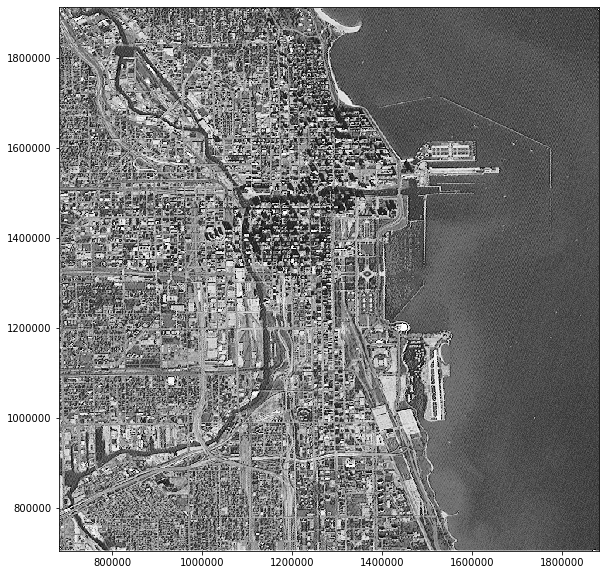

In [139]:
# plot the band with Matplotlib

fig = plt.figure(figsize=(12,10))
plt.imshow(band1, cmap='gray', extent=chicago_tif.bounds)

<a id='basic_plot'></a>
## Basic Plotting

<b>Matplotlib</b> is powerful for generating graphs. Here is a simple example graph:

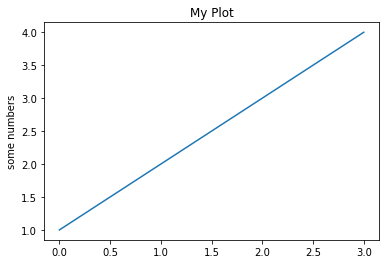

In [140]:
plt.plot([1,2,3,4])
plt.title('My Plot')
plt.ylabel('some numbers')
plt.show()   

<b>Python libraries</b> optimized for <b>visualizing geospatial vector data</b> will be covered in a later notebook!

Enjoy getting to know Python through Jupyter Notebooks!